In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams.update({'font.size': 18})

theta = np.array([np.pi/15, -np.pi/9, -np.pi/20])
sigma = np.diag([3,1,0.5])

print("theta")
print(theta)

print("sigma")
print(sigma)


Rx = np.array([[1,0,0],
               [0, np.cos(theta[0]), -np.sin(theta[0])],
               [0, np.sin(theta[0]), np.cos(theta[0])]
               ])

Ry = np.array([[np.cos(theta[1]), 0, np.sin(theta[1])],
               [0,1,0],
               [-np.sin(theta[1]), 0, np.cos(theta[1])]]
)

Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
               [np.sin(theta[2]), np.cos(theta[2]), 0],
               [0,0,1]
               ])

print("Rx")
print(Rx)
print("Ry")
print(Ry)
print("Rz")
print(Rz)


X = Rz @ Ry @ Rx @ sigma

print("X")
print(X)

U, S, Vt = np.linalg.svd(X, full_matrices=False)
X_SVD = U @ np.diag(S)

print("X_SVD")
print(X_SVD)
print("U")
print(U)
print("S")
print(S)
print("Vt")
print(Vt)

theta
[ 0.20943951 -0.34906585 -0.15707963]
sigma
[[3.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  0.5]]
Rx
[[ 1.          0.          0.        ]
 [ 0.          0.9781476  -0.20791169]
 [ 0.          0.20791169  0.9781476 ]]
Ry
[[ 0.93969262  0.         -0.34202014]
 [ 0.          1.          0.        ]
 [ 0.34202014  0.          0.93969262]]
Rz
[[ 0.98768834  0.15643447  0.        ]
 [-0.15643447  0.98768834  0.        ]
 [ 0.          0.          1.        ]]
X
[[ 2.78437034  0.08278149 -0.18147596]
 [-0.44100094  0.97722903 -0.0765087 ]
 [ 1.02606043  0.19537308  0.45957904]]
X_SVD
[[-2.78437034  0.08278149 -0.18147596]
 [ 0.44100094  0.97722903 -0.0765087 ]
 [-1.02606043  0.19537308  0.45957904]]
U
[[-0.92812345  0.08278149 -0.36295192]
 [ 0.14700031  0.97722903 -0.1530174 ]
 [-0.34202014  0.19537308  0.91915808]]
S
[3.  1.  0.5]
Vt
[[-1. -0. -0.]
 [-0.  1.  0.]
 [-0.  0.  1.]]


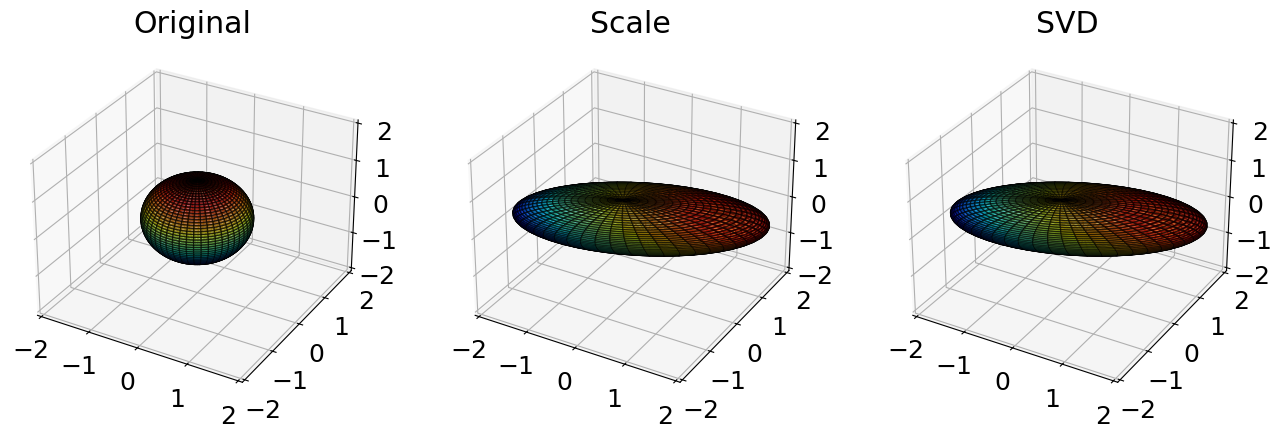

In [8]:
fig = plt.figure()

# Original Data
ax1 = fig.add_subplot(131, projection='3d')
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0,np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

surf1 = ax1.plot_surface(x , y, z, cmap='jet', alpha = 0.6)
surf1.set_edgecolor('k')
ax1.set_title("Original")
ax1.set_xlim3d(-2,2)
ax1.set_ylim3d(-2,2)
ax1.set_zlim3d(-2,2)

# Stretched based set factors
xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j], y[i,j], z[i,j]]
        vecR = X @ vec
        xR[i,j] = vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]

ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(xR , yR, zR, cmap='jet', alpha = 0.6)
surf2.set_edgecolor('k')
ax2.set_title("Scale")
ax2.set_xlim3d(-2,2)
ax2.set_ylim3d(-2,2)
ax2.set_zlim3d(-2,2)

# Stretched based on factors
xSVD = np.zeros_like(x)
ySVD = np.zeros_like(y)
zSVD = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j], y[i,j], z[i,j]]
        vecR = X @ vec
        xSVD[i,j] = vecR[0]
        ySVD[i,j] = vecR[1]
        zSVD[i,j] = vecR[2]

ax3 = fig.add_subplot(133, projection='3d')
surf3 = ax3.plot_surface(xSVD , ySVD, zSVD, cmap='jet', alpha = 0.6)
surf3.set_edgecolor('k')
ax3.set_title("SVD")
ax3.set_xlim3d(-2,2)
ax3.set_ylim3d(-2,2)
ax3.set_zlim3d(-2,2)
plt.show()